## Google 에서 검색 자료 다운로드 하기

In [ ]:
# 소스코드 - 자세한 사용법은 유튜브 영상을 참조하세요.
# 영상 제작 날짜 기준의 코드입니다. 이후 사이트 구조가 달라지거나 기타 이유로 작동하지 않을 수 있습니다.
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver

import requests

baseUrl = 'https://www.google.com/search?q='
plusUrl = input('무엇을 검색할까요? :')
url = baseUrl + quote_plus(plusUrl)

driver = webdriver.Chrome('../chrome/mac/chromedriver')
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html)

r = soup.select('.r')
print(r[0])
for i in r:
#    print(i.select_one('.ellip').text)
     print(i.select_one('.LC20lb.DKV0Md').get_text())
     print(i.a.attrs['href'])
#     print(i.find(class_='.LC201b.DKV0Md').get_text())
     print()
    
f = open('./output/' + f'{plusUrl}.csv', 'w', encoding='utf-8', newline='')
csvWriter = csv.writer(f)
for i in searchList:
    csvWriter.writerow(i)
f.close()
    
driver.close()

## Google 에서 이미지 다운로드 하기

어떤사진을 검색할까요? :징계위원회


/Users/seongy.yoon/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/seongy.yoon/opt/anaconda3/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


<img alt="징계위원회 출석통지서 양식 파일 : 네이버 블로그" class="rg_i Q4LuWd" data-atf="true" data-deferred="1" data-iml="855.8149999998932" height="200" jsname="Q4LuWd" src="" width="142"/>

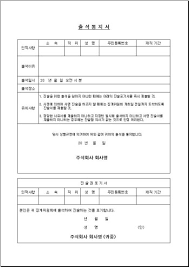

완료되었습니다.


In [4]:
from urllib.request import urlretrieve
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver

import requests

search = input('어떤사진을 검색할까요? :')
url = f'https://www.google.com/search?q={quote_plus(search)}&source=Inms&tbm=isch&sa=X&ved=\
2ahUKEwid64aF87LoAhUafd4KHcEtBZEQ_AUoAXoECBgQAw&biw=1536&bih=754'

driver = webdriver.Chrome('../chrome/mac/chromedriver')
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html)

img = soup.select('.rg_i.Q4LuWd')
#img = soup.select('.bRMDJf')
print(img[0])

n = 1
imgurl = []

for i in img:
    try:
        imgurl.append(i.attrs['src'])
    except KeyError:
        imgurl.append(i.attrs['data-src'])
        
for i in imgurl:
    urlretrieve(i, './images/google/' + search + str(n) + '.jpg')
    n +=1
    
driver.close()

print('완료되었습니다.')

## NAVER 에서 검색 자료 다운로드 하기

In [15]:
import csv
import urllib.request
from urllib.parse import quote_plus
from bs4 import BeautifulSoup

search = input('검색어를 입력하세요:')
pageNum = 1
i = input('검색할 페이지 수? :')   # 숫자를 입력받아도 input()함수는 문자로 저장된다.
# 블로그 검색 1페이지는 끝에 숫자가 01,  2페이지는 11, 5페이지는 41... 10페이지는 91 붙는다
lastPageNum = int(i) * 10 - 9
#f = open(f'{search}.csv', 'w', encoding='utf-8', newline='')
searchList = []

# 아래 주소 줄에서 주황색부분, quote_plus() 를 추가하여 search에 한글 제목이 입력 될 경우 , 
# 한글제목.csv로 저장 되도록 한다  '한글 검색어에 대한 대응(변환)을 위해 quote_plus( ) 함수 사용하여 변환.
# 검색 페이지별로 url이 달라지는 부분은 아래 주황색 부분인 것을 클릭해보면 알아 낼 수 있다.

while pageNum < lastPageNum + 1:
    url = f'https://search.naver.com/search.naver?date_from=&date_option=0&date_to=&dup_remove=\
1&nso=&post_blogurl=&post_blogurl_without=&query={quote_plus(search)}&sm=tab_pge&srchby=all&st=\
sim&where=post&start={pageNum}'
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.find_all(class_='sh_blog_title')

    for i in title:
        temp = []
        temp.append(i.text)       # 각 타이틀 제목 저장
        temp.append(i.attrs['href'])  # 각 타이틀 제목의 링크 저장
        searchList.append(temp)
        print(i.attrs['title'])   # 콘솔창에 출력
        print(i.attrs['href'])    # 콘솔창에 출력
        print()  # 공백(빈줄) 출력
    pageNum += 10    # 페이지마다 주소 끝에 붙는 숫자가(pageNum) 10 단위씩 변하기 때문

f = open('./images/naver/' + f'{search}.csv', 'w', encoding='utf-8', newline='')
csvWriter = csv.writer(f)
for i in searchList:
    csvWriter.writerow(i)
f.close()

검색어를 입력하세요:면접
검색할 페이지 수? :5
무경력 29살 남자, 경력직 제치고 최종합격한 면접 답변 전략은?
https://blog.naver.com/kil8853?Redirect=Log&logNo=221990936893

9급교육행정직 필기부터 면접까지
https://blog.naver.com/joyan57?Redirect=Log&logNo=222027050348

공기업면접학원 피드백 만족했어요
https://blog.naver.com/tkwmlstk?Redirect=Log&logNo=222009815827

[서울대 일반전형 면접] 서울대 면접 후기 & 준비 꿀팁!
https://blog.naver.com/metivna?Redirect=Log&logNo=221858388442

2021학년도 한성과고 입학전형 - 온라인 입학설명회, 전년도 경쟁률, 소집면접 기출문항…
https://blog.naver.com/u2math?Redirect=Log&logNo=222022729977

2020군무원시험일정 필기부터 면접, 최종합격까지!
https://blog.naver.com/eduwill_good?Redirect=Log&logNo=222033431368

신한대학교 수시등급(2020) 및 면접예상질문
https://blog.naver.com/kmimi77?Redirect=Log&logNo=222045981794

2020 서울신용보증재단 면접 경력자들만 합격? 과연..
https://blog.naver.com/livwilly?Redirect=Log&logNo=222046737461

스터디를 여러 개 신청했지만, 결국 국가직공무원 면접대비는 스티마 교수님!
https://blog.naver.com/gongdangi_?Redirect=Log&logNo=222030400601

공무원 면접 미흡방지 집중훈련 프로그램(Ft.사전조사서)
https://blog.naver.com/hellstudy?Redirect=Log&logNo=222032727704

군무원

## NAVER 에서 이미지 다운로드 하기

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus

baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어를 입력하세요 : ')
# 한글 검색 자동 변환
url = baseUrl + quote_plus(plusUrl)
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')

n = 1
for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open('./images/naver/' + plusUrl + str(n)+'.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    n += 1
print('다운로드 완료')

검색어를 입력하세요 : 징계위원회
다운로드 완료


## NAVER 에서 환율 다운로드 하기

In [152]:
from bs4 import BeautifulSoup
import urllib.request as req

url = "https://finance.naver.com/marketindex/"

res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser", from_encoding='euc-kr')

name_nation = soup.select('h3.h_lst > span.blind')
name_price = soup.select('span.value')

i = 0
for c_list in soup:
    try:
        print(i+1, name_nation[i].text, name_price[i].text)
        i = i + 1
    except IndexError:
        pass
#------------------------------------------------------------------------------    
f = open('./output/' + '환율.csv', 'w', encoding = 'utf-8')
    
i = 0
for c_list in soup:
    try:
        f.write(str(i+1) + ',' + name_nation[i].text + ',' + name_price[i].text + '\n')
        i = i + 1
    except IndexError:
        pass
    
f.close()
print('다운로드 완료')

1 미국 USD 1,204.00
2 일본 JPY(100엔) 1,131.42
3 유럽연합 EUR 1,395.07
4 중국 CNY 171.41
5 일본 엔/달러 106.1200
6 달러/유로 1.1656
7 달러/영국파운드 1.2794
8 달러인덱스 94.3800
9 WTI 41.29
10 휘발유 1361.06
11 국제 금 1897.3
12 국내 금 73293.98
다운로드 완료


## INSTAGRAM 에서 이미지 다운로드 하기

In [1]:
# 소스코드 - 자세한 사용법은 유튜브 영상을 참조하세요.
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver
import time

baseUrl = 'https://www.instagram.com/explore/tags/'
plusUrl = input('검색할 태그를 입력하세요 : ')
url = baseUrl + quote_plus(plusUrl)

driver = webdriver.Chrome('../chrome/mac/chromedriver')
driver.get(url)

time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html)

insta = soup.select('.v1Nh3.kIKUG._bz0w')
print(len(insta))

n = 1
for i in insta:
#   print('https://www.instagram.com'+ i.a['href'])
    imgUrl = i.select_one('.KL4Bh').img['src']
#   print('imgUrl =', imgUrl)
    with urlopen(imgUrl) as f:
        with open('./images/instagram/' + plusUrl + str(n) + '.jpg', 'wb') as h:
            img = f.read()
            h.write(img)
    n += 1
    print(n, imgUrl)

driver.close()
print('다운로드 완료')

검색할 태그를 입력하세요 : 징계위원회


/Users/seongy.yoon/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/seongy.yoon/opt/anaconda3/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


33
2 https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/94671454_124350899224488_7513946228471407960_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=100&_nc_ohc=cIPB_iunEmsAX-6YWAv&oh=1c55e3052c0881cb60a0334ae953f4aa&oe=5F5FF5D0
3 https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/106115022_301052877934194_4035254586230231783_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=106&_nc_ohc=zhPz7Hm9Zu8AX8Fj9gE&oh=05dc47779ad89a66bea3773a3a423bd0&oe=5F5F8FFA
4 https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/e35/c157.0.406.406a/100086563_2702101673366536_3388989119349698686_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=104&_nc_ohc=G530quBbLcUAX9Da_CU&oh=8e7fef3febad6ff453d56c97450e8edb&oe=5F387196
5 https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.134.1080.1080a/s640x640/49906715_1981331098838208_7166074260436616621_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=100&_nc_ohc=_cmhjwWRY90AX8OxKor

34 https://scontent-gmp1-1.cdninstagram.com/v/t51.2885-15/e15/c0.90.720.720a/s640x640/27878178_1458874060902000_5537150410134913024_n.jpg?_nc_ht=scontent-gmp1-1.cdninstagram.com&_nc_cat=100&_nc_ohc=6gAqIMiXZwAAX_iBz2k&oh=cdec579f1c47fe5801aeca5c79914847&oe=5F60603A
다운로드 완료


## PIXABAY에서 720 x 480 이미지 다운로드 하기

In [ ]:
#bs의 select 사용법

#soup.select('태그')
#soup.select('.클래스명') 혹은 ('태그.클래스명')
#soup.select('#아이디명') 혹은 ('태그#아이디명')
#soup.select('태그 > 자식태그')
#soup.select('태그 자손태그')

In [12]:
# 소스코드 - 자세한 사용법은 유튜브 영상을 참조하세요.
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import urllib.request

baseUrl = 'https://pixabay.com/ko/images/search/'
plusUrl = input('검색할 태그를 입력하세요 : ')
url = baseUrl + quote_plus(plusUrl)

driver = webdriver.Chrome('../chrome/mac/chromedriver')
driver.get(url)

time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html)

insta = soup.select('.item')
print(len(insta))  
    
n = 1
for i in insta:
    new_url = 'https://pixabay.com' + i.a['href']
    print('n, new_url =', n, new_url)
    img = i.find('img').get('srcset').split(',')[1][:-2]
    imgUrl = urllib.request.Request(img, headers={'User-Agent': 'Mozilla/5.0'})
    with urlopen(imgUrl) as f:
        with open('./images/pixabay/' + plusUrl + str(n) + '.jpg', 'wb') as h:
            img = f.read()
            h.write(img)
    print('imgUrl = ', imgUrl)
    n += 1
        
driver.close()
print('다운로드 완료')

검색할 태그를 입력하세요 : 신입사원
0
다운로드 완료


## PIXABAY에서 1208 x 853 이미지 다운로드

In [2]:
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import urllib.request

baseUrl = 'https://pixabay.com/ko/images/search/'
plusUrl = input('검색할 태그를 입력하세요 : ')
url = baseUrl + quote_plus(plusUrl)                         # Main URL

driver = webdriver.Chrome('../chrome/mac/chromedriver')
driver.get(url)

time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html)

urls = soup.select('.item')
print(len(insta))  
    
n = 1
for i in urls[0:25]:
    new_url = 'https://pixabay.com' + i.a['href']            # The 2nd URL

##  driver = webdriver.Chrome('../chrome/mac/chromedriver')
    driver.get(new_url)

    time.sleep(2)

    html = driver.page_source
    soup = BeautifulSoup(html)

    img = soup.find('img').get('srcset').split(',')[1]
##  print('img = ', img)
    img = img.strip().split(' ')[0]
##  print('img = ', img)
    imgUrl = urllib.request.Request(img, headers={'User-Agent': 'Mozilla/5.0'})
    
    with urlopen(imgUrl) as f:
        with open('./images/pixabay/' + plusUrl + str(n) + '.jpg', 'wb') as h:
            img = f.read()
            h.write(img)
    print('imgUrl = ', n, imgUrl)
    
    time.sleep(3)
    
    n += 1    
        
driver.close()
print('다운로드 완료')

검색할 태그를 입력하세요 : 징계위원회
33
다운로드 완료


### 한번에 이미지 25개를 크롤링하여 저장해 보도록 하겠습니다.
* 출처 : https://geundung.dev/36

In [113]:
from bs4 import BeautifulSoup
import urllib.request

def get(max_count = 1):
    base_url = "http://10000img.com/"
    url = "http://10000img.com/ran.php"
    
    count = 1
    while count <= max_count:
        print("+------------------ [ %d번 째 이미지 ] -------------+" % count)
        
        html = urllib.request.urlopen(url)
        source = html.read()
        
        soup = BeautifulSoup(source, "html.parser")
        
        img = soup.find("img")  
        img_src = img.get("src")
        img_url = base_url + img_src
        img_name = img_src.replace("/", "")
        
        urllib.request.urlretrieve(img_url, "./output/" + img_name)
        
        print("이미지 src:", img_src)
        print("이미지 url:", img_url)
        print("이미지  명:", img_name)
        count += 1
    else:
        print("크롤링 종료")
        
#with open('./images/' + plusUrl + str(n) + '.jpg', 'wb') as h:
#    img = f.read()
#    h.write(img)
        
get(50)

+------------------ [ 1번 째 이미지 ] -------------+
이미지 src: rimg1/les92.jpg
이미지 url: http://10000img.com/rimg1/les92.jpg
이미지  명: rimg1les92.jpg
+------------------ [ 2번 째 이미지 ] -------------+
이미지 src: rimg1/pbr59.gif
이미지 url: http://10000img.com/rimg1/pbr59.gif
이미지  명: rimg1pbr59.gif
+------------------ [ 3번 째 이미지 ] -------------+
이미지 src: rimg1/byy80.jpg
이미지 url: http://10000img.com/rimg1/byy80.jpg
이미지  명: rimg1byy80.jpg
+------------------ [ 4번 째 이미지 ] -------------+
이미지 src: rimg1/aiv99.jpg
이미지 url: http://10000img.com/rimg1/aiv99.jpg
이미지  명: rimg1aiv99.jpg
+------------------ [ 5번 째 이미지 ] -------------+
이미지 src: rimg1/kng55.jpg
이미지 url: http://10000img.com/rimg1/kng55.jpg
이미지  명: rimg1kng55.jpg
+------------------ [ 6번 째 이미지 ] -------------+
이미지 src: rimg1/joe65.jpg
이미지 url: http://10000img.com/rimg1/joe65.jpg
이미지  명: rimg1joe65.jpg
+------------------ [ 7번 째 이미지 ] -------------+
이미지 src: rimg1/sup21.jpg
이미지 url: http://10000img.com/rimg1/sup21.jpg
이미지  명: rimg1sup21.jpg
+------------

In [61]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm

def get_images(keyword):

    #keyword = input('수집할 키워드를 입력하세요 :') #'손흥민'

    # 웹 접속 - 네이버 이미지 접속
    print("접속중")
    driver = webdriver.Chrome('../chrome/mac/chromedriver')
    driver.implicitly_wait(20)

    url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query={}'.format(keyword)
    driver.get(url)

    # 페이지 스크롤 다운
    body = driver.find_element_by_css_selector('body')
    for i in range(3):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)
        
    # 이미지 링크 수집
    imgs = driver.find_elements_by_css_selector('img._img')    
    result = []
    for img in tqdm(imgs):
        if 'http' in img.get_attribute('src'):
            result.append(img.get_attribute('src'))
    #print(result)

    driver.close()
    print('수집완료')

    #폴더 생성
    print('폴드생성')
    import os
    if not os.path.isdir('./{}'.format(keyword)):
        os.mkdir('./{}'.format(keyword))
    
    #다운로드
    print('다운로드')
    from urllib.request import urlretrieve

    for index, link in tqdm(enumerate(result)):
        start = link.rfind('.')
        end = link.rfind('&')
        #print(result[start:end])
        filetype = link[start:end] #.png

        urlretrieve(link,'./{0}/{1}{2:03d}{3}'.format(keyword,keyword,index,filetype))

    print("다운로드 완료")

    # 압축
    import zipfile
#    zip_file = zipfile.ZipFile('./{}/{}.zip'.format(keyword,keyword),'w')
    zip_file = zipfile.ZipFile('./{}.zip'.format(keyword),'w')

    #print(os.listdir('./{}'.format(keyword)))
    for image in os.listdir('./{}'.format(keyword)):
        print(image,'압축파일에 추가중')
        zip_file.write('./{}/{}'.format(keyword,image),compress_type=zipfile.ZIP_DEFLATED)
    zip_file.close()
    print('압축완료')
    
if __name__ == '__main__':
    keyword = input('수집할 이미지 키워드를 입력하세요 :')
    get_images(keyword)

# 출처 : https://www.youtube.com/watch?v=LxlH4bR1PI0

수집할 이미지 키워드를 입력하세요 :각선미
접속중


100%|██████████| 250/250 [00:01<00:00, 192.39it/s]
3it [00:00, 24.62it/s]

수집완료
폴드생성
다운로드


200it [00:07, 27.48it/s]


다운로드 완료
각선미065.jpg 압축파일에 추가중
각선미071.jpg 압축파일에 추가중
각선미059.jpg 압축파일에 추가중
각선미111.jpg 압축파일에 추가중
각선미105.jpg 압축파일에 추가중
각선미139.jpg 압축파일에 추가중
각선미138.jpg 압축파일에 추가중
각선미104.jpg 압축파일에 추가중
각선미110.jpg 압축파일에 추가중
각선미058.jpg 압축파일에 추가중
각선미070.jpg 압축파일에 추가중
각선미064.jpg 압축파일에 추가중
각선미099.jpg 압축파일에 추가중
각선미072.jpg 압축파일에 추가중
각선미066.jpg 압축파일에 추가중
각선미106.jpg 압축파일에 추가중
각선미112.jpg 압축파일에 추가중
각선미113.jpg 압축파일에 추가중
각선미107.jpg 압축파일에 추가중
각선미067.jpg 압축파일에 추가중
각선미073.jpg 압축파일에 추가중
각선미098.jpg 압축파일에 추가중
각선미088.jpg 압축파일에 추가중
각선미077.jpg 압축파일에 추가중
각선미063.jpg 압축파일에 추가중
각선미117.jpg 압축파일에 추가중
각선미116.jpg 압축파일에 추가중
각선미102.jpg 압축파일에 추가중
각선미062.jpg 압축파일에 추가중
각선미076.jpg 압축파일에 추가중
각선미089.jpg 압축파일에 추가중
각선미008.gif 압축파일에 추가중
각선미048.JPG 압축파일에 추가중
각선미060.jpg 압축파일에 추가중
각선미074.jpg 압축파일에 추가중
각선미128.jpg 압축파일에 추가중
각선미114.jpg 압축파일에 추가중
각선미100.jpg 압축파일에 추가중
각선미101.JPG 압축파일에 추가중
각선미115.jpg 압축파일에 추가중
각선미129.jpg 압축파일에 추가중
각선미075.jpg 압축파일에 추가중
각선미061.jpg 압축파일에 추가중
각선미049.jpg 압축파일에 추가중
각선미006.jpg 압축파일에 추가중
각선미012.jpg 압축파일에 추가중
각선미199.jpg 압축파일에 추가중
각선미17

In [59]:
pwd

'/Users/seongy.yoon/Crawling'

In [46]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

sendEmail = 'syoondy' #'yseongyoung' #@gmail.com'
recvEmail = 'syoon@irpe.or.kr'
password = 'rnd@3230' #'vudrkeks@202'

smtpName = 'smtp.gmail.com' # smtp 서버 주소
smtpPort = 587 # smtp 포트 번호

# 여러 MIME을 넣기 위한 MIMEMultipart 객체 생성
msg = MIMEMultipart()

# 본문 추가
text = '안녕하세요?'
contentPart = MIMEText(text) # MIMRText(text,_charset = 'utf8')
msg.attach(contentPart)

# 파일 추가
etcFileName = 'test.txt'
with open(etcFileName, 'rb') as etcFD:
    etcPart = MIMEApplication(etcFD.read())
    # 첨부파일의 정보를 헤더로 추가
    etcPart.add_header('Content-Disposition', 'attachment', filename=etcFileName)
    msg.attach(etcPart)

msg['Subject'] = '메일 제목'
msg['From'] = sendEmail
msg['To'] = recvEmail
print(msg.as_string())

s = smtplib.SMTP(smtpName, smtpPort) # 메일서버 연결
s.starttls() # TLS 보안 처리
s.login(sendEmail, password) # 로그인
s.sendmail(sendEmail, recvEmail, msg.as_string()) # 메일 전송, 문자열로 변환해야 합니다.
s.close() # smtp 서버연결을 종료합니다.

Content-Type: multipart/mixed; boundary="===============8502659549246633827=="
MIME-Version: 1.0
Subject: =?utf-8?b?66mU7J28IOygnOuqqQ==?=
From: syoondy
To: syoon@irpe.or.kr

--===============8502659549246633827==
Content-Type: text/plain; charset="utf-8"
MIME-Version: 1.0
Content-Transfer-Encoding: base64

7JWI64WV7ZWY7IS47JqUPw==

--===============8502659549246633827==
Content-Type: application/octet-stream
MIME-Version: 1.0
Content-Transfer-Encoding: base64
Content-Disposition: attachment; filename="test.txt"

0M8R4KGxGuEAAAAAAAAAAAAAAAAAAAAAPgADAP7/CQAGAAAAAAAAAAAAAAADAAAAAgAAAAAAAAAA
EAAABwAAAAIAAAD+////AAAAAAMAAABGAAAA1gAAAP//////////////////////////////////
////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////////////////////
///////////////////

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials q10sm14852471pfs.75 - gsmtp')

In [39]:
pwd

'/Users/seongy.yoon/Crawling'

In [53]:
import sys, os, mail_form
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from smtplib import SMTP_SSL
from PyQt5.QuWidgets import *

class main(QWidget, mail.form.Ui_form):
    def __init__(self):
        super().__init__()
        super().setupUi(self)
        #https://myaccount.google.com/security -> 보안 수준이 낮은 앱 허용 : 사용
        self.servr ='smtp.gmail.com'
        self.port = 465
        self.id = ''
        self.pw = ''
        self.setUi()
        self.setSlot()
        
        def setUi(self):
            self.txtAtt.setReadOnly(True)
        
        def setSlot(self):
            self.btnAtt.clicked.connect(self.selectFile)
            self.btnReset.clicked.connect(self.reset)
            self.btn.Send.clicked.connect(self.send)
            
        def selectFile(self):
            att = QFileDialog.getOpenFileName(self, "파일 선택")[0]
            if not att = "":
                self.txtAtt.setText(att)
                
        def reset(self):
            self.txtAtt.setText('')
            self.txtCont.setText('')
            self.txtTitle.setText('')
            self.txtTo.setText('')
            
        def send(self):
            add = self.txtTo.text()
            title = self.txtTitle.text()
            cont = self.txtCont.toPlainText()
            att = False if self.txtAtt.text() == '' else self.txtAtt.text()
            msg = MIMEMultipart('mixed') if att else IMEMultpart('alternative')
            msg['From'] = '리턴제로'
            msg['To'] = add
            msg['subject'] = title
            msg.attach(MIMEText(cont))
            
        if att:
            file_data = MIMEBase('application','octet-stream')
            f = open(att, 'rb')
            file_contents = f.read()
            file_data.set_payload(file_contents)
            encoders.encode_base64(file_data)
            
            file_data.add_header('Content-Disposition','attachment',filename=os.path.basename(att))
            msg.attach(file_data)
            
        smtp = SMTP_SSL(self.server, self.port)
        smtp.login(self.id, self.pw)
        smtp.sendmail(self.id + '@gmail.com', add, msg.as_string())
        smtp.close()
        
app = QApplication([])

SyntaxError: invalid syntax (<ipython-input-53-1f7d3b0a3f2c>, line 31)

In [52]:
pip mail_form

ERROR: unknown command "mail_form"
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup
import urllib.request

def get(max_count = 1):
    base_url = "https://www.nbc.com/"
    url = "https://www.nbc.com/nightly-news/video/nbc-nightly-news-aug-7-2020/4208404"
    
    html = urllib.request.urlopen(url)
    source = html.read()
        
    soup = BeautifulSoup(source, "html.parser")    
    
    video = soup.find('div',{'class':'tpVideo'})
    
    print('video=',video)
    

    

        
#with open('./images/' + plusUrl + str(n) + '.jpg', 'wb') as h:
#    img = f.read()
#    h.write(img)
        
get(1)

video= None
